In [4]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [5]:
import yfinance as yf

ticker_symbol = 'TSLA'
tesla_stock = yf.Ticker(ticker_symbol)
tesla_stock_data=tesla_stock.history(period='max')
tesla_stock_data.reset_index(inplace=True)

print(tesla_stock_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


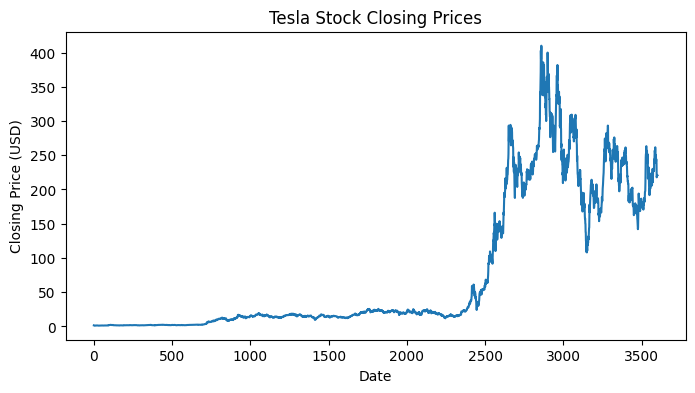

In [15]:
tesla_stock_data['Close'].plot(figsize=(8, 4), title='Tesla Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.show()

In [7]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')
table = soup.find_all('table', {'class': 'historical_data_table table'})

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for table in table:
    if "Tesla Quarterly Revenue" in table.text:
        rows = table.find_all('tr')
        for row in rows[1:]: 
            cols = row.find_all('td')
            if len(cols) == 2:  
                date = cols[0].text.strip()  
                revenue = cols[1].text.strip() 
                
                if revenue: 
                    new_row = pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])
                    tesla_revenue = pd.concat([tesla_revenue, new_row], ignore_index=True)

tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',', '').str.replace('$', '')
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != '']  
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].astype(float)
print(tesla_revenue.tail(5))

          Date  Revenue
48  2010-09-30     31.0
49  2010-06-30     28.0
50  2010-03-31     21.0
51  2009-09-30     46.0
52  2009-06-30     27.0


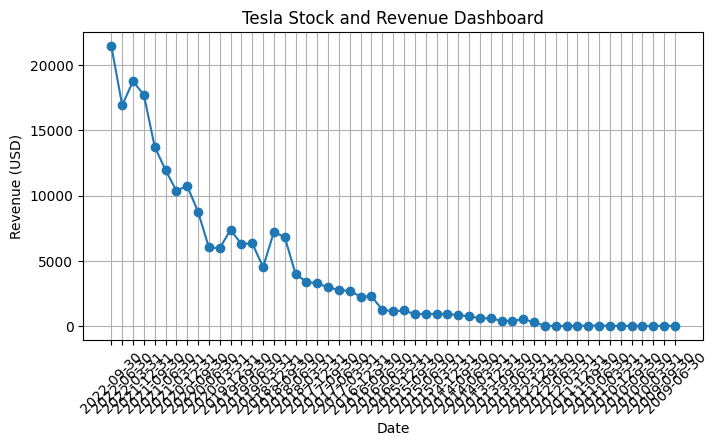

In [16]:
# Dashboard
plt.figure(figsize=(8, 4))
plt.plot(tesla_revenue['Date'], tesla_revenue['Revenue'], marker='o')
plt.title('Tesla Stock and Revenue Dashboard')
plt.xlabel('Date')
plt.ylabel('Revenue (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [12]:
ticker_symbol = 'GME'
GME_stock = yf.Ticker(ticker_symbol)
GME_stock_data=GME_stock.history(period='max')
GME_stock_data.reset_index(inplace=True)

print(GME_stock_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578048  1.607505   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


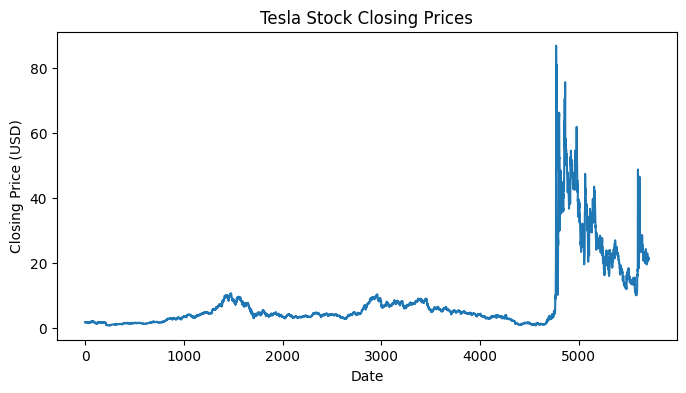

In [17]:
GME_stock_data['Close'].plot(figsize=(8, 4), title='Tesla Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.show()

In [10]:
url2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response1 = requests.get(url2)
soup1 = BeautifulSoup(response1.text, 'lxml')
table = soup1.find_all('table', {'class': 'historical_data_table table'})
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for table in table:
    if "GameStop Quarterly Revenue" in table.text:
        rows = table.find_all('tr')
        
        for row in rows[1:]: 
            cols = row.find_all('td')
            if len(cols) == 2: 
                date = cols[0].text.strip()
                revenue = cols[1].text.strip() 
                
                if revenue: 
                    new_row = pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])
                    gme_revenue = pd.concat([gme_revenue, new_row], ignore_index=True)

gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(',', '').str.replace('$', '')
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ''] 
gme_revenue['Revenue'] = gme_revenue['Revenue'].astype(float)
print(gme_revenue.tail())

          Date  Revenue
57  2006-01-31   1667.0
58  2005-10-31    534.0
59  2005-07-31    416.0
60  2005-04-30    475.0
61  2005-01-31    709.0


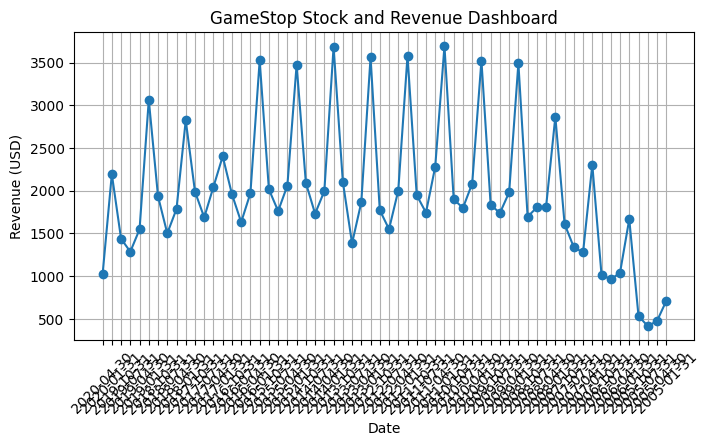

In [18]:
#GameStop Stock and Revenue Dashboard
plt.figure(figsize=(8, 4))
plt.plot(gme_revenue['Date'], gme_revenue['Revenue'], marker='o')
plt.title('GameStop Stock and Revenue Dashboard')
plt.xlabel('Date')
plt.ylabel('Revenue (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
